In [5]:
import pandas as pd
from plotnine.ggplot import save_as_pdf_pages
from plotnine import *
import numpy as np
from wordcloud import WordCloud
from IPython.display import display
from pandas.api.types import CategoricalDtype

# Load tidied data
books = pd.read_csv('../data/tidy/books.csv')
df = books[books['ownership']=='His']

Summary counts for dataset

In [6]:
for col in ['he_has_read', 'has_googlebooks_data', 'has_openbooks_data',
            'publisher', 'authors', 'published_date']:
    display(pd.DataFrame(df[col].value_counts()))

,he_has_read
1,300
0,86


,has_googlebooks_data
1.0,328


,has_openbooks_data
1.0,283


,publisher
John Wiley & Sons,21
Penguin,14
Simon and Schuster,11
Routledge,8
Wiley,8
Harper Collins,7
Wiley-Blackwell,5
Michael Wiese Productions,4
W. W. Norton & Company,4
SAGE,4


,authors
Steve Wexler;Jeffrey Shaffer;Andy Cotgreave,8
Karl E. Weick,3
Christopher Kenworthy,3
Suzanne Collins,2
Steven E. Landsburg,2
Scott McCloud,2
Nassim Nicholas Taleb,2
Nancy Duarte,2
Garr Reynolds,2
Bill Kovach;Tom Rosenstiel,2


,published_date
2009,19
2010,17
2007,17
2006,15
2011,15
2008,13
2012,10
1999,10
2017-04-24,8
2005,8


Generate bar chart by categories and he_has_read

In [7]:
columns = ['he_has_read','category']
data = pd.DataFrame(df.groupby(columns).size()).reset_index()
data.columns = columns + ['count']
data.sort_values('count',ascending=False,inplace=True)

# Create ordering for categories
categories = df.groupby('category').size().sort_values().index
categories = CategoricalDtype(categories=categories, ordered=True)
data['category'] = data['category'].astype(categories)

data['he_has_read'] = data['he_has_read'].astype(str).replace({'0':"No",'1':"Yes"})
no_yes_cat = CategoricalDtype(categories=["No","Yes"], ordered=True)
data['he_has_read'] = data['he_has_read'].astype(no_yes_cat)

/usr/local/lib/python2.7/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 8 x 12 in image.
  from_inches(height, units), units))
/usr/local/lib/python2.7/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: testplot.png
  warn('Filename: {}'.format(filename))


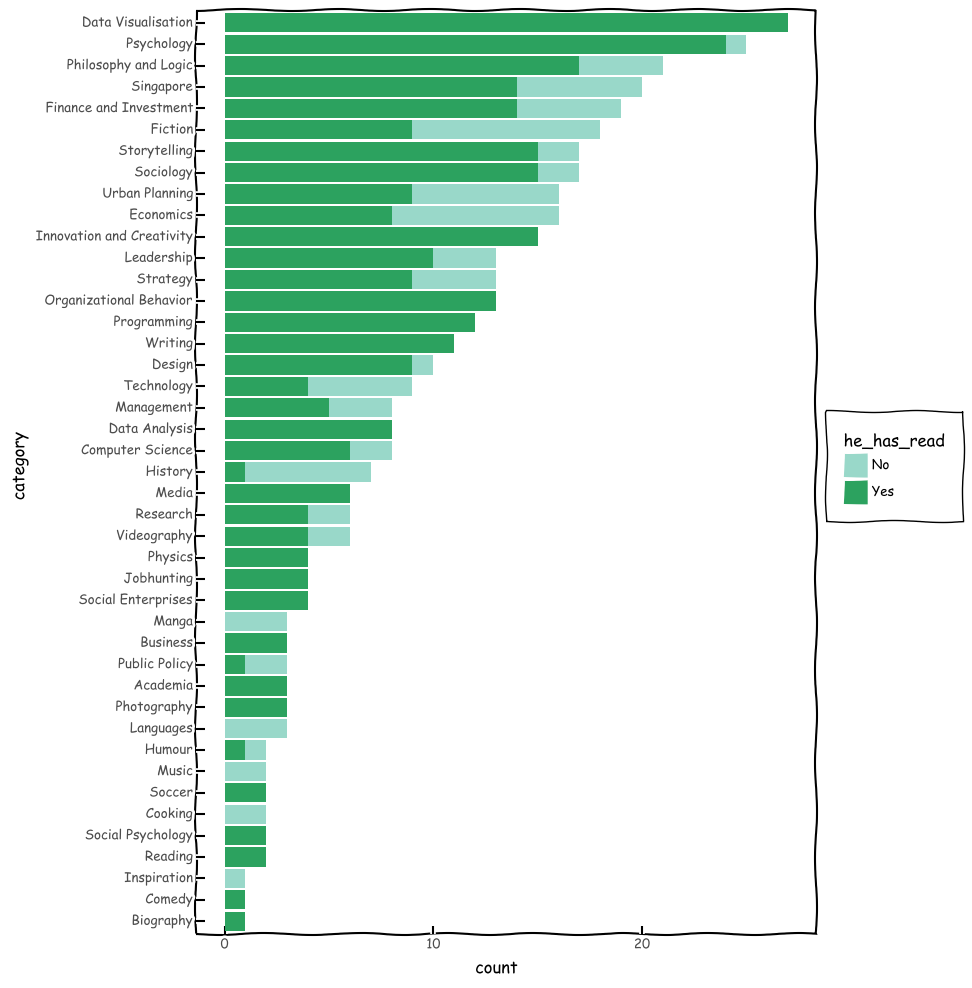

<ggplot: (283186041)>

In [52]:
from palettable.colorbrewer.diverging import RdYlBu_3_r
p = (ggplot(data, aes(x='category', y='count',fill='he_has_read'))
     + geom_bar(stat='identity')
     + scale_fill_manual(values=['#99d8c9','#2ca25f'])
     + coord_flip()
     + theme_xkcd()
     + theme(figure_size=(8, 12),
             plot_background=element_rect(fill='white'))
)
ggplot.save(p, filename='testplot.png', path=None)
p

/usr/local/lib/python2.7/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 8 x 12 in image.
  from_inches(height, units), units))
/usr/local/lib/python2.7/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: testplot.png
  warn('Filename: {}'.format(filename))


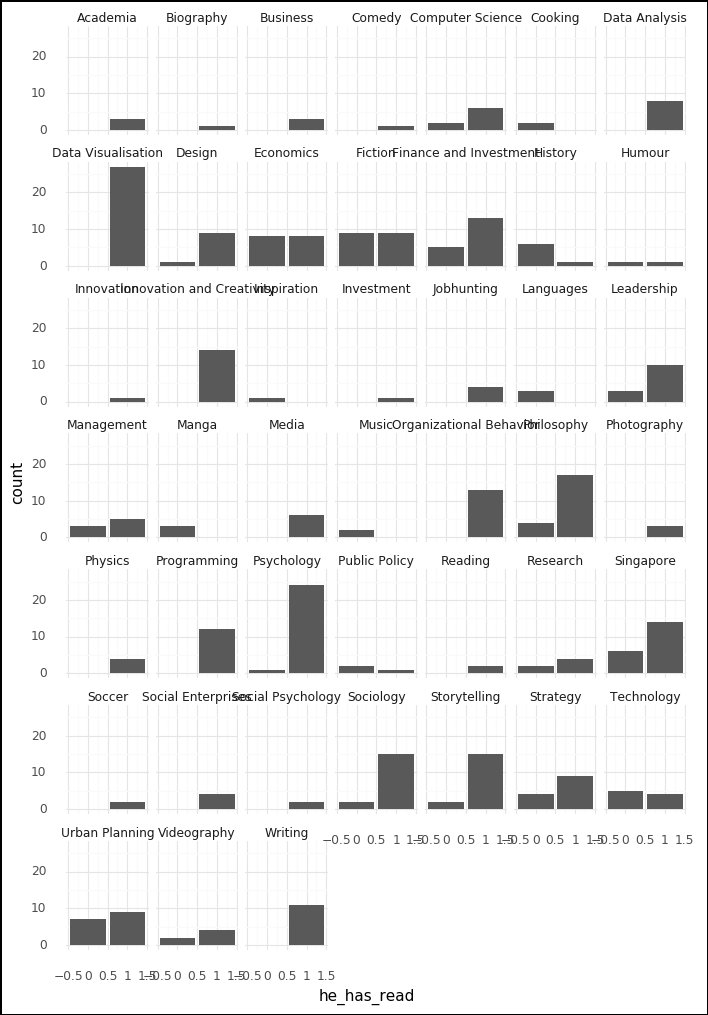

<ggplot: (288695897)>

In [16]:
p = (ggplot(data, aes(x='he_has_read', y='count'))
     + geom_bar(stat='identity')
     + facet_wrap('~category')
     + theme_minimal()
     + theme(figure_size=(8, 12),
             plot_background=element_rect(fill='white'))
)
ggplot.save(p, filename='testplot.png', path=None)
p

In [4]:
p = (ggplot(df, aes('he_has_read'))
     + geom_bar()
     + facet_wrap('~category')
     + theme_minimal()
     + theme(figure_size=(8, 12),
             plot_background=element_rect(fill='white'))
)

plots.append(p)
ggplot.save(p, filename='testplot.png', path=None)

/usr/local/lib/python2.7/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 8 x 12 in image.
  from_inches(height, units), units))
/usr/local/lib/python2.7/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: testplot.png
  warn('Filename: {}'.format(filename))


Generate word cloud for categories

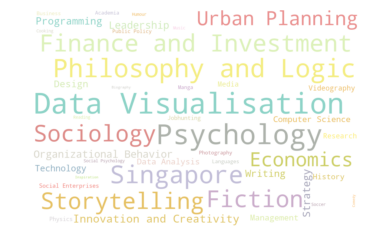

In [9]:
from palettable.colorbrewer.qualitative import Set3_12
texts = list(df['category'].values)
texts = [x.split(";") for x in texts if x is not np.nan]

# Some stuff in the columns that I don't want to appear in the wordcloud.
stopwords = [np.nan, 'Protected DAISY', 'In library', 'Accessible book', 
             'Internet Archive Wishlist', 'OverDrive', 'Open Library Staff Picks',
            'Long Now Manual for Civilization','New York Times bestseller']
texts = [item.strip() for t in texts for item in t]
texts = [x for x in texts if x not in stopwords]

# Wordcloud settings
wc = WordCloud(width=1080,height=720,max_words=50,
               background_color='white', colormap=Set3_12.mpl_colormap)

# Generate word cloud
wc.generate_from_frequencies(pd.Series(texts).value_counts())

# Save to file
wc.to_file('test.png')

# Display the generated image
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()